random forest when predicting test data points: 0.89
random forest when predicting validation data points: 0.90


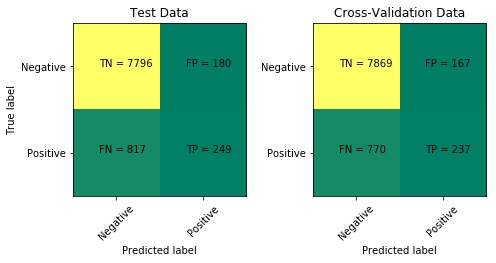

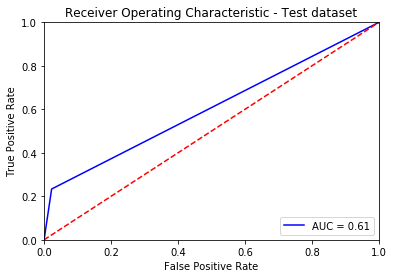

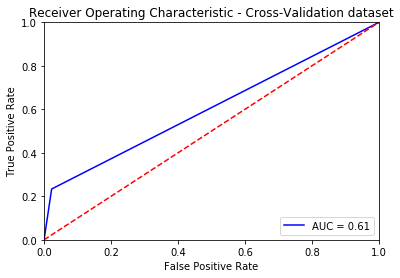

In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
from warnings import simplefilter
%matplotlib inline
import matplotlib.pyplot as plt
simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

bankdata = pd.read_excel("bank-full.xlsx")

#Removes rows that are missing any feature. inplace = True means that the data in bankdata var is changed
bankdata.dropna(inplace = True)

# Converting the predictor variable in a binary numeric variable
bankdata['Column1.1.17'].replace(to_replace='yes', value=1, inplace=True)
bankdata['Column1.1.17'].replace(to_replace='no',  value=0, inplace=True)

#convert the categorical variables into dummy variables. This is done by creating a new column for each possible value
#that a feature may possess, and using a 0 or 1 to indicate if the value in the new column should be no/yes
df_dummies = pd.get_dummies(bankdata)

#y is an array of churn values, X is a 2D array of all the dummy features
#drop 1.1.10 b/c day of contact probably doesn't matter
y = df_dummies['Column1.1.17'].values
X = df_dummies.drop(columns = ['Column1.1.17', 'Column1.1.10'])

# features = X.columns.values
#creates a scaler that will convert all values in X to fit between 0 and 1
scaler = MinMaxScaler(feature_range = (0,1))
#computes the min and max of each feature in X, necessary for next line
scaler.fit(X)
#scales features to fit between 0 and 1
X = pd.DataFrame(scaler.transform(X))
# X.columns = features

#splits the data set into 3 groups: training (60%), testing (20%), validation (20%)
X_train_test, X_validation, y_train_test, y_validation = train_test_split(X, y, test_size = .2, random_state=99)
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size= .25, random_state = 99)

#trains the random classifier
clf = RandomForestClassifier(n_estimators=80)
clf.fit(X_train, y_train)
#makes predictions from the testing set
test_results = clf.predict(X_test)
#prints the difference between the actual testing churn values and the predicted ones
print("random forest when predicting test data points: {:.2f}".format(metrics.accuracy_score(y_test, test_results)))
#predicts on the validation set
validation_results = clf.predict(X_validation)
#prints the difference between the validation churn values and the predicted ones
print("random forest when predicting validation data points: {:.2f}".format(metrics.accuracy_score(y_validation, validation_results)))

#Confusion Matrix
cm = confusion_matrix(y_test, test_results)

#Pretty printing Confusion Matrix. Using the summer setting for the color map (cmap) lets all four data values be seen
#without masking the most important result. A higher value is more yellow, a lower value is more green
plt.figure(figsize=[7, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(cm, interpolation='nearest', cmap = plt.cm.summer)
classNames = ['Negative','Positive']
plt.title('Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j - .2, i, str(s[i][j])+" = "+str(cm[i][j]))
        
#Cross-validation confusion matrix plot
cm2 = confusion_matrix(y_validation, validation_results)        
plt.subplot(1, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap = plt.cm.summer)
classNames = ['Negative','Positive']
plt.title('Cross-Validation Data')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
for i in range(2):
    for j in range(2):
        plt.text(j - .2,i, str(s[i][j])+" = "+str(cm2[i][j]))
        
plt.tight_layout()
plt.show()

#ROC curve

# calculate the fpr and tpr for all thresholds of the classification - test set
fpr, tpr, threshold = metrics.roc_curve(y_test, test_results)
roc_auc = metrics.auc(fpr, tpr)

# print ROC curve for test dataset
plt.clf()
plt.title('Receiver Operating Characteristic - Test dataset')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

# calculate the fpr and tpr for all thresholds of the classification - cv set
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, test_results)
roc_auc2 = metrics.auc(fpr2, tpr2)

# print ROC curve for cv dataset
plt.clf()
plt.title('Receiver Operating Characteristic - Cross-Validation dataset')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()